# Lista de Exercícios 2: Amostragem de sinais

> Felipe Andrade Garcia Tommaselli- 11800910

- Slide Aula 2: https://marofe.github.io/controle-digital/2024/aula2.html



In [220]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, freqz, filtfilt
from scipy.signal import cheby1, lfilter

### **Objetivo:**  
O objetivo desta prática é simular a discretização de um sinal contínuo com diferentes períodos de amostragem. Para isso, considere o sinal:

$$ y(t) = 1 + \cos(\omega_n t) + \sin(2\omega_n t), \text{ onde } \omega_n = 10\pi $$

**Passos:**

1. **Plotagem do sinal:**  
   Mostre o sinal \( y(t) \) para o intervalo \( t = [0, 2] \) usando um gráfico.

2. **Espectro de frequência:**  
   Obtenha o espectro de frequência de \( y(t) \) utilizando a Transformada de Fourier (FFT). Qual é a frequência máxima do sinal?  
   *(Dica: Consulte a documentação da função `fft` para mais detalhes.)*

3. **Amostragem na frequência de Nyquist:**  
   Faça a amostragem do sinal na frequência de Nyquist (\( \hat{f_s} = 2f_M \)) e mostre o resultado utilizando a função `stem`. Compare com o sinal contínuo.  
   Usando apenas as amostras do sinal, é possível reconstruir de forma única o sinal contínuo? Justifique.

4. **Amostragem abaixo da frequência de Nyquist:**  
   Faça a amostragem do sinal em uma frequência abaixo da de Nyquist (\( \hat{f_s} < 2f_M \)) e mostre o resultado utilizando `stem`. Compare com o sinal contínuo.  
   Obtenha também o sinal com aliasing (\( \omega_b = \omega_n - \omega_s \)) e compare.

5. **Amostragem acima da frequência de Nyquist:**  
   Faça a amostragem do sinal em uma frequência acima da de Nyquist (\( \hat{f_s} > 2f_M \)) e mostre o resultado utilizando `stem`.

   *(Dica: Consulte a documentação da função `fft` para mais detalhes.)*

**Exemplo de código em MATLAB:**

```matlab
n = numel(y); % Obtém o tamanho do vetor sinal
Y = fft(y); % Calcula a FFT (Transformada de Fourier bilateral)
Y = abs(fftshift(Y) / n); % Obtém a magnitude da FFT
f = fa / n * (-floor(n/2):floor(n/2)); % Vetor de frequências
figure; % Cria uma nova figura
plot(f, Y); % Plota o espectro de y
```


In [221]:
# Definindo os parâmetros
omega_n = 10 * np.pi
t = np.linspace(0, 2, 1000)  # Vetor de tempo de 0 a 2 segundos

# Definindo o sinal y(t)
y_t = 1 + np.cos(omega_n * t) + np.sin(2 * omega_n * t)

# Calculando a FFT
n = len(y_t)
Y = np.fft.fft(y_t)  # FFT de y(t)
#Y = np.fft.fftshift(Y)  # Shift da FFT para centralizar no zero
Y = np.abs(Y) / n  # Normaliza a FFT

# Definindo o vetor de frequências
fa = 1 / (t[1] - t[0])  # Frequência de amostragem
f = np.fft.fftfreq(n, d=(t[1] - t[0]))  # Vetor de frequências

half = len(f) // 2
f = f[:half]
Y = Y[:half]

# calcular o valor max 
max_index = np.argmax(Y[1:])
max_freq = f[max_index]

print(f'max_freq: {max_freq}')

max_freq: 4.4955


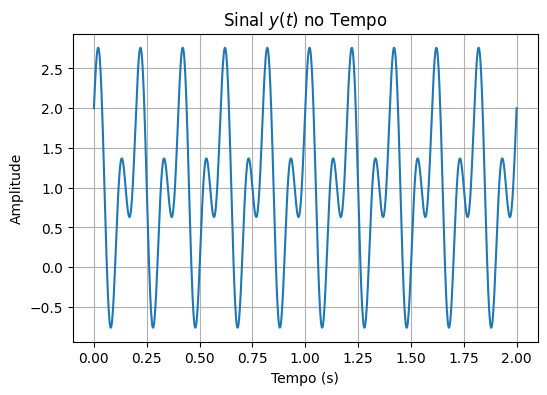

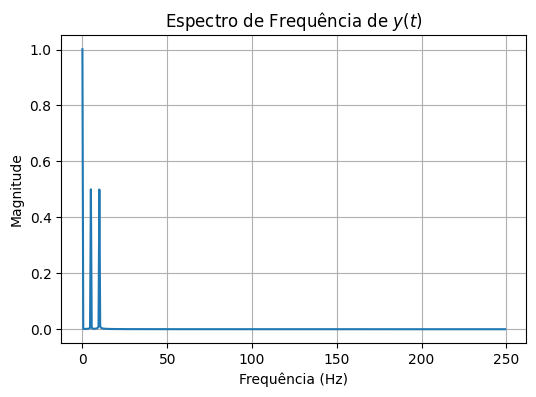

In [222]:
# Plotando o sinal no tempo
plt.figure(figsize=(6,4))
plt.plot(t, y_t)
plt.title('Sinal $y(t)$ no Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotando o espectro de frequência
plt.figure(figsize=(6,4))
plt.plot(f, Y)
plt.title('Espectro de Frequência de $y(t)$')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [223]:
# Parâmetros do sinal
omega_n = 10 * np.pi
t_continuous = np.linspace(0, 2, 1000)  # Sinal contínuo de 0 a 2 segundos
y_continuous = 1 + np.cos(omega_n * t_continuous) + np.sin(2 * omega_n * t_continuous)

# Frequência de Nyquist
fM = omega_n / (2 * np.pi)  # Frequência máxima do sinal
fs_nyquist = 2 * fM  # Frequência de Nyquist

# Amostragem na frequência de Nyquist
t_nyquist = np.arange(0, 2, 1/fs_nyquist)
y_nyquist = 1 + np.cos(omega_n * t_nyquist) + np.sin(2 * omega_n * t_nyquist)

# Amostragem abaixo da frequência de Nyquist (fs < 2fM)
fs_below_nyquist = fM  # Frequência abaixo da de Nyquist
t_below_nyquist = np.arange(0, 2, 1/fs_below_nyquist)
y_below_nyquist = 1 + np.cos(omega_n * t_below_nyquist) + np.sin(2 * omega_n * t_below_nyquist)

# Amostragem acima da frequência de Nyquist (fs > 2fM)
fs_above_nyquist = 10 * fM  # Frequência acima da de Nyquist
t_above_nyquist = np.arange(0, 2, 1/fs_above_nyquist)
y_above_nyquist = 1 + np.cos(omega_n * t_above_nyquist) + np.sin(2 * omega_n * t_above_nyquist)

# Calculando o aliasing (ωb = ωn - ωs) para a amostragem abaixo da de Nyquist
omega_s_below_nyquist = 2 * np.pi * fs_below_nyquist
omega_b = omega_n - omega_s_below_nyquist
y_aliasing = 1 + np.cos(omega_b * t_below_nyquist) + np.sin(2 * omega_b * t_below_nyquist)


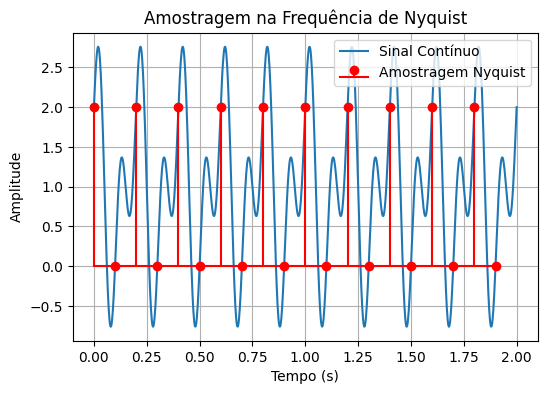

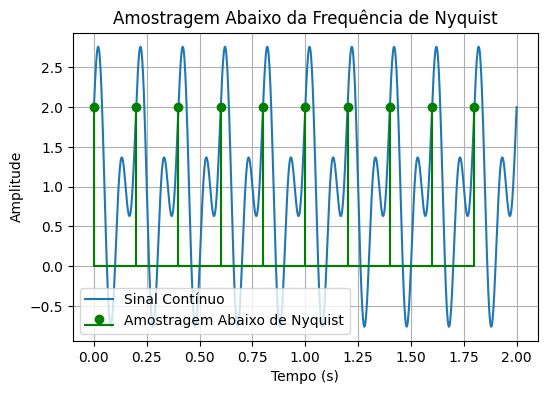

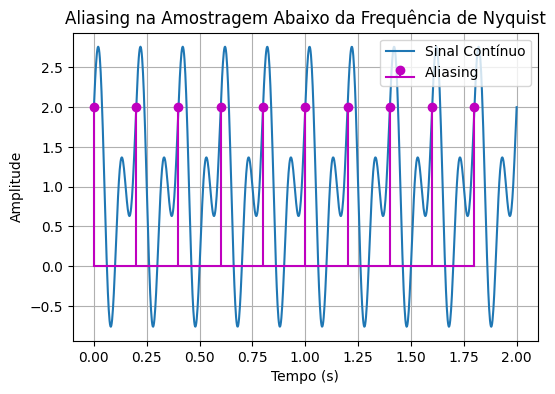

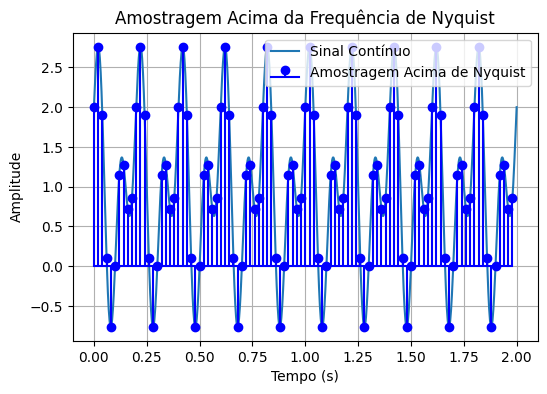

In [224]:
# Plotando o sinal contínuo e a amostragem na frequência de Nyquist
plt.figure(figsize=(6, 4))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_nyquist, y_nyquist, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.title('Amostragem na Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plotando o sinal contínuo e a amostragem abaixo da frequência de Nyquist
plt.figure(figsize=(6, 4))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_below_nyquist, y_below_nyquist, linefmt='g-', markerfmt='go', basefmt='g-', label='Amostragem Abaixo de Nyquist')
plt.title('Amostragem Abaixo da Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plotando o sinal de aliasing gerado pela amostragem abaixo de Nyquist
plt.figure(figsize=(6, 4))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_below_nyquist, y_aliasing, linefmt='m-', markerfmt='mo', basefmt='m-', label='Aliasing')
plt.title('Aliasing na Amostragem Abaixo da Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plotando o sinal contínuo e a amostragem acima da frequência de Nyquist
plt.figure(figsize=(6, 4))
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_above_nyquist, y_above_nyquist, linefmt='b-', markerfmt='bo', basefmt='b-', label='Amostragem Acima de Nyquist')
plt.title('Amostragem Acima da Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


**Exercício 2:**

Considere o sinal: 

$$y(t) = \cos(2\pi t)$$

**Passos:**

(a) Mostre o sinal em tempo contínuo no intervalo \([0, 3]\) usando `plot`.

(b) Obtenha o espectro de frequência usando `fft`.

(c) Faça a amostragem do sinal usando a frequência de Nyquist para obter \( y_a[k] \) e mostre usando `stem`.

(d) Construa o sinal \( y_a^*(t) \) (usando trem de impulsos) e mostre usando `stem`.

(e) Obtenha o espectro de \( y_a^*(t) \) usando `fft`. O que pode-se concluir com o espectro do sinal amostrado na frequência de Nyquist?

(f) Repita o item anterior, porém, com 10x a frequência máxima do sinal. O que pode-se concluir com o espectro do sinal amostrado nessa nova frequência de amostragem?


In [225]:
# (a) Definindo o sinal y(t) no intervalo [0, 3]
t_continuous = np.linspace(0, 3, 1000)
y_continuous = np.cos(2 * np.pi * t_continuous)

# (b) Obtendo o espectro de frequência usando FFT
n = len(y_continuous)
Y = np.fft.fft(y_continuous)  # Calcula a FFT de y(t)
Y = np.fft.fftshift(Y)  # Centraliza o espectro em torno de zero
Y = np.abs(Y) / n  # Normaliza a magnitude da FFT

# Definindo o vetor de frequências
fa = 1 / (t_continuous[1] - t_continuous[0])  # Frequência de amostragem
f = np.fft.fftfreq(n, d=(t_continuous[1] - t_continuous[0]))
f = np.fft.fftshift(f)  # Centraliza as frequências

# (c) Amostragem do sinal usando a frequência de Nyquist
fs_nyquist = 2 * 1  # Frequência de Nyquist (2 vezes a frequência máxima do sinal)
t_nyquist = np.arange(0, 3, 1 / fs_nyquist)
y_nyquist = np.cos(2 * np.pi * t_nyquist)

# (d) Construção do sinal y_a*(t) usando trem de impulsos
T = t_nyquist[1] - t_nyquist[0]
sinc = np.sinc((t_continuous[:, np.newaxis] - t_nyquist[np.newaxis, :]) / T)
y_impulse_train = np.dot(sinc, y_nyquist)


# (e) Espectro de y_a*(t) usando FFT
Y_impulse = np.fft.fft(y_impulse_train)
Y_impulse = np.fft.fftshift(Y_impulse)
Y_impulse = np.abs(Y_impulse) / len(y_impulse_train)

# (f) Amostragem do sinal com 10x a frequência máxima do sinal
fs_high = 10 * 2 * 1  # 10 vezes a frequência de Nyquist
t_high = np.arange(0, 3, 1 / fs_high)
y_high = np.cos(2 * np.pi * t_high)

# Construção do sinal y_a* (t) para a nova frequência de amostragem
y_impulse_train_high = np.zeros_like(y_continuous)
for i in range(len(t_high)):
    idx = np.argmin(np.abs(t_continuous - t_high[i]))
    y_impulse_train_high[idx] = y_high[i]

# Espectro do sinal amostrado com alta frequência usando FFT
Y_high_impulse = np.fft.fft(y_impulse_train_high)
Y_high_impulse = np.fft.fftshift(Y_high_impulse)
Y_high_impulse = np.abs(Y_high_impulse) / len(y_impulse_train_high)

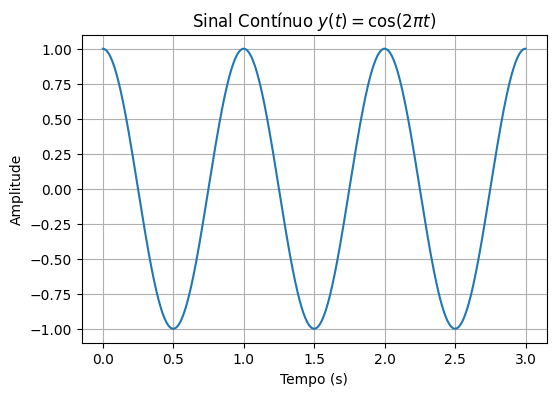

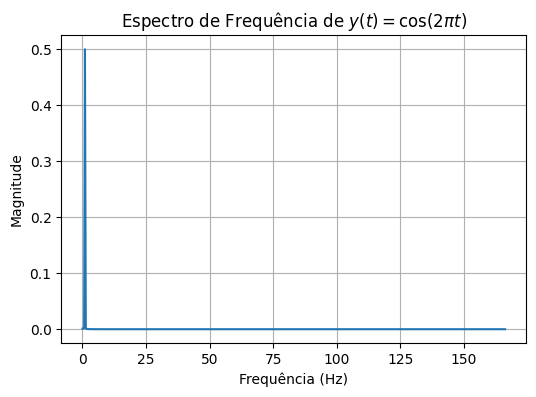

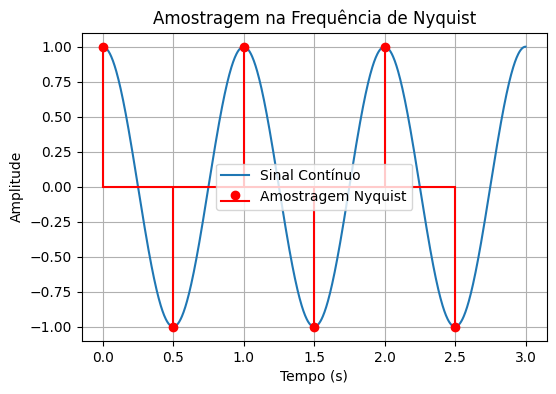

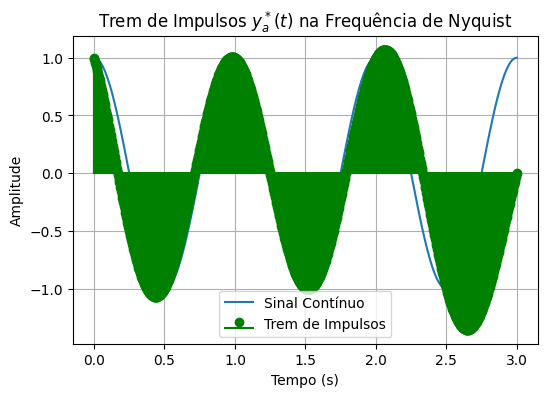

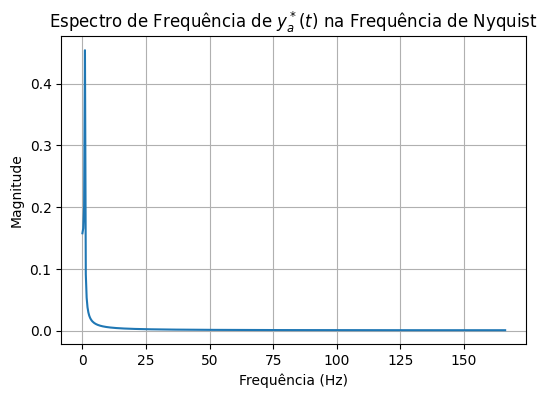

In [226]:
# (a) Plot do sinal contínuo no intervalo [0, 3]
plt.figure(figsize=[6,4])
plt.plot(t_continuous, y_continuous)
plt.title('Sinal Contínuo $y(t) = \cos(2\pi t)$')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# (b) Plot do espectro de frequência do sinal contínuo
plt.figure(figsize=[6,4])
plt.plot(f[len(f)//2:], Y[len(f)//2:])
plt.title('Espectro de Frequência de $y(t) = \cos(2\pi t)$')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# (c) Plot da amostragem do sinal usando a frequência de Nyquist
plt.figure(figsize=[6,4])
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_nyquist, y_nyquist, linefmt='r-', markerfmt='ro', basefmt='r-', label='Amostragem Nyquist')
plt.title('Amostragem na Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# (d) Plot do sinal y_a*(t) usando trem de impulsos
plt.figure(figsize=[6,4])
plt.plot(t_continuous, y_continuous, label='Sinal Contínuo')
plt.stem(t_continuous, y_impulse_train, linefmt='g-', markerfmt='go', basefmt='g-', label='Trem de Impulsos')
plt.title('Trem de Impulsos $y_a^*(t)$ na Frequência de Nyquist')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# (e) Plot do espectro de y_a*(t) usando FFT
plt.figure(figsize=[6,4])
plt.plot(f[len(f)//2:], Y_impulse[len(f)//2:])
plt.title('Espectro de Frequência de $y_a^*(t)$ na Frequência de Nyquist')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# (f) Plot do espectro do sinal amostrado com alta frequência
# plt.figure(figsize=[6,4])
# plt.plot(f, Y_high_impulse)
# plt.title('Espectro de Frequência de $y_a^*(t)$ com Alta Frequência de Amostragem')
# plt.xlabel('Frequência (Hz)')
# plt.ylabel('Magnitude')
# plt.grid(True)
# plt.show()


### 3. Obtenha a func¸ao de transferência de um filtro passa-baixa do tipo Butterworth com ˆfc = 2Hz e mostre a resposta em frequencia

In [227]:
# Definindo os parâmetros do filtro
fc = 2  # Frequência de corte em Hz
fs = 10  # Frequência de amostragem em Hz
order = 4  # Ordem do filtro

# Calculando a frequência normalizada
Wn = fc / (0.5 * fs)

# Projetando o filtro Butterworth
b, a = butter(order, Wn, btype='low', analog=False)

# Obtendo a resposta em frequência do filtro
w, h = freqz(b, a, worN=8000, fs=fs)

# (c) Exibindo os coeficientes do filtro
print("Coeficientes do filtro Butterworth:")
print("b:", b)
print("a:", a)

Coeficientes do filtro Butterworth:
b: [0.04658291 0.18633163 0.27949744 0.18633163 0.04658291]
a: [ 1.         -0.7820952   0.67997853 -0.1826757   0.03011888]


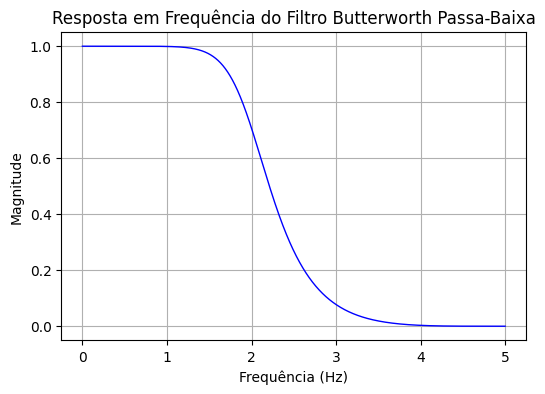

In [228]:
# (a) Resposta em frequência do filtro
plt.figure(figsize=(6, 4))
plt.plot(w, np.abs(h), 'b-', lw=1)
plt.title('Resposta em Frequência do Filtro Butterworth Passa-Baixa')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


### 4. Aplique o filtro passa-baixa Butterworth do item anterior (usando comando filter) no sinal amostrado no exercìıcio 2 com frequencia fs = fM, fs = 2fM e depois com fs = 10fM. Mostre os resultados usando stem e plot. Em qual situação foi possıvel recuperar o sinal com qualidade razoavel? Justifique.

In [229]:
sampling_freq = 1 
sampling_period = 1 / sampling_freq

t_sampled_fm = np.arange(0, 3, sampling_period)
y_sampled_fm = np.cos(2 * np.pi * t_sampled_fm)

# Nyquist frequency and sampling period
sampling_freq = 2 
sampling_period = 1 / sampling_freq

# Sampled signal at Nyquist frequency
t_sampled_2fm = np.arange(0, 3, sampling_period)
y_sampled_2fm = np.cos(2 * np.pi * t_sampled_2fm)

sampling_freq = 10 
sampling_period = 1 / sampling_freq

t_sampled_10fm = np.arange(0, 3, sampling_period)
y_sampled_10fm = np.cos(2 * np.pi * t_sampled_10fm)

y_filtered_fm = lfilter(b, a, y_sampled_fm)
y_filtered_2fm = lfilter(b, a, y_sampled_2fm)
y_filtered_10fm = lfilter(b, a, y_sampled_10fm)

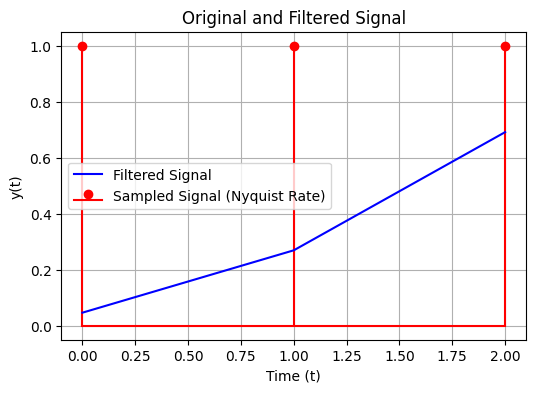

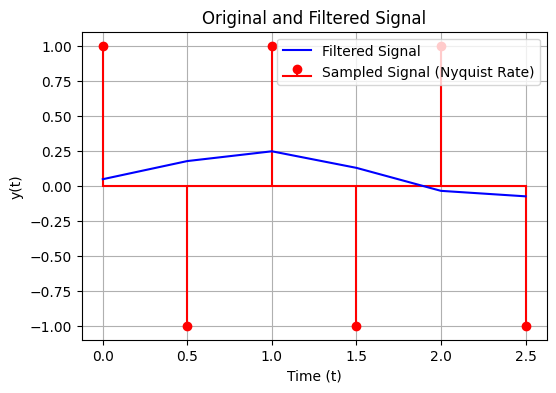

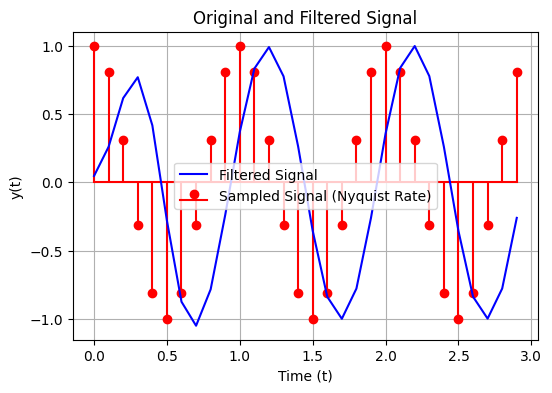

In [230]:
plt.figure(figsize=(6,4))
plt.stem(t_sampled_fm, y_sampled_fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')
plt.plot(t_sampled_fm, y_filtered_fm, label='Filtered Signal', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.stem(t_sampled_2fm, y_sampled_2fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')
plt.plot(t_sampled_2fm, y_filtered_2fm, label='Filtered Signal', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.stem(t_sampled_10fm, y_sampled_10fm, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal (Nyquist Rate)')
plt.plot(t_sampled_10fm, y_filtered_10fm, label='Filtered Signal', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()

5. Repita o exerciıcio anterior com o sinal do exercıcio 1. Explore diferentes estruturas de filtros passa-baixa (sera necessario fazer sintonia do filtro)

> dica: acesse Comparison of Analog IIR Lowpass Filters no site do Matlab e escolha uma estrutura de filtro que voce ache mais interessante. ˆ


```matlab
Exemplo:
1 fa=1e4; %10kHz para o sinal continuo
2 fc =0.6*fs; %frequencia de corte abaixo da fs
3 [b,a] = cheby1(6,10,fc/(fa/2));
4 yrec=filter(b,a,ya trem);
5 figure
6 plot(t,y/max(y),LineWidth=1.5) %plot normalizado
7 hold on
8 stem(t,ya trem/max(ya trem))%plot normalizado
9 plot(t,yrec/max(yrec(2000:end)),LineWidth=1.5)%plot normalizado
10 legend('original','y aˆ*(t)','y r(t)')
```

In [231]:
omega_n = 10 * np.pi
t_continuous = np.linspace(0, 2, 1000)  # Continuous time
y_continuous = 1 + np.cos(omega_n * t_continuous) + np.sin(2 * omega_n * t_continuous)

# Nyquist frequency and sampling period
sampling_freq = 80
sampling_period = 1 / sampling_freq

# Sampled signal
t_sampled = np.arange(0, 2, sampling_period)
y_sampled = 1 + np.cos(omega_n * t_sampled) + np.sin(2 * omega_n * t_sampled)

# Filter design parameters
fc = 15  
order = 4  
ripple = 0.5  
fs = 50  

# Normalized cutoff frequency for digital filter
Wn = fc / (fs / 2) 

# Design the Chebyshev Type I low-pass filter (digital)
b, a = cheby1(order, ripple, Wn, btype='low', analog=False)  

# Apply the Chebyshev filter to the sampled signal
y_filtered = lfilter(b, a, y_sampled)

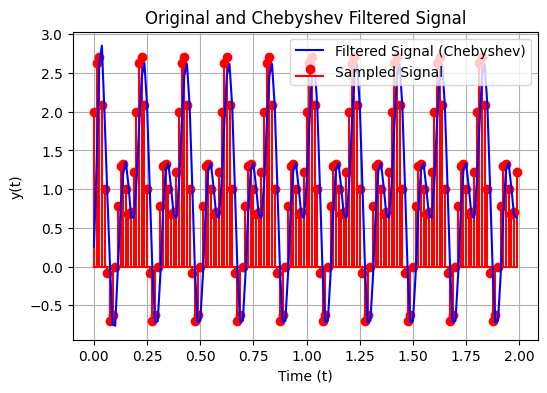

In [232]:
plt.figure(figsize=(6,4))
plt.stem(t_sampled, y_sampled, linefmt='r-', markerfmt='ro', basefmt='r-', label='Sampled Signal')
plt.plot(t_sampled, y_filtered, label='Filtered Signal (Chebyshev)', linestyle='-', color='blue')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Original and Chebyshev Filtered Signal')
plt.legend()
plt.grid(True)
plt.show()